In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# A procedural approach
def square(n):
    sqrs = []
    for i in range(n):
        sqrs.append(i**2)
    return sqrs

sqrs = square(10)
sqrs

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [7]:
# Functional. Avoids side effects, defining extra things
sqrsGen = lambda r: [n**2 for n in range(r)]
sqrsGen(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [9]:
class Observation(): # a pythonic "object" and "class" are synonomous 
    def __init__(self,data): # a method
        self.data = data    # attribute
                            # no assumptions of the form of data made (a bad general practice)
    def average(self): # method
        dsum = 0
        for i,d, in enumerate(self.data):
            dsum += d
        average = dsum/(i+1)
        return average

In [10]:
obs1 = Observation([0,1,2])
obs2 = Observation([4,5,6])

In [17]:
print("Avg 1 = {:5.2e}; Avg 2 = {:5.2e}".format(obs1.average(), obs2.average()))
print("Type of Avg 1 = {:}; Type of Avg 2 = {:}".format(type(obs1),type(obs2)))

Avg 1 = 1.00e+00; Avg 2 = 5.00e+00
Type of Avg 1 = <class '__main__.Observation'>; Type of Avg 2 = <class '__main__.Observation'>


In [18]:
print(obs1.data)
print(obs2.data)

[0, 1, 2]
[4, 5, 6]


In [53]:
class TimeSeries(Observation):
    def __init__(self,time,data):
        self.time = time
        super().__init__(data)
        if len(self.time) != len(self.data):
            raise ValueError("Time and data must have same length")
            
    def stop_time(self):
        return self.time[-1]

In [54]:
tobs = TimeSeries([0,1,2],[3,4,5])
print(tobs)
print("Stop time = {:e}".format(tobs.stop_time()))
print("tobs average = {:e}".format(tobs.average()))

Stop time = 2.000000e+00
tobs average = 4.000000e+00


In [23]:
type(ts)

__main__.TimeSeries

In [64]:
x = np.linspace(0,2*np.pi, 1000)
y_theory = np.sinc(x)
y = y_theory+np.random.normal(0,.2,len(y_theory))

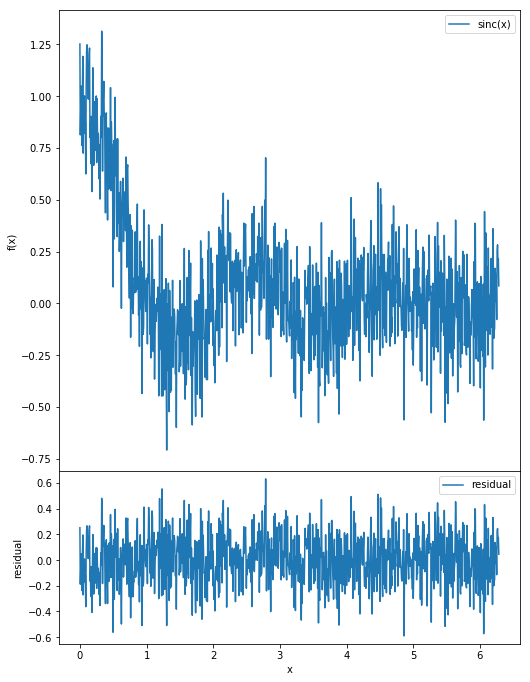

In [65]:
fig = plt.figure(figsize=(8,8))
ax_data = fig.add_axes([0.1,0.4,0.8,0.8])
ax_residual = fig.add_axes([0.1,0.1,0.8,0.3])

ax_data.plot(x,y, label='sinc(x)')
ax_data.legend()
ax_data.set_ylabel('f(x)')

ax_residual.plot(x,y-y_theory, label='residual')
ax_residual.legend()
ax_residual.set_xlabel('x')
ax_residual.set_ylabel('residual')

In [66]:
# Project, build a digital Orrery, a mechanical model of the orrery.
# Make an n-body simulation (of 9ish). Brute force.